In [97]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [158]:
df=pd.read_csv("C:/Users/MSI/Documents/Internship/demand_temperature.csv")
df_cleaned = df.dropna()
df_cleaned

,Date,Demand,Temperature
0,1/1/2014 0:00,3.794,18.05
1,1/1/2014 1:00,3.418,17.20
2,1/1/2014 2:00,3.152,16.45
3,1/1/2014 3:00,3.026,16.65
4,1/1/2014 4:00,3.022,16.40
...,...,...,...
1339,2/25/2014 19:00,4.968,20.10
1340,2/25/2014 20:00,4.742,19.90
1341,2/25/2014 21:00,4.304,19.30
1342,2/25/2014 22:00,4.105,19.05


In [159]:
df.columns=["Timestamp","Demand","Temperature"]
df.head()

,Timestamp,Demand,Temperature
0,1/1/2014 0:00,3.794,18.05
1,1/1/2014 1:00,3.418,17.20
2,1/1/2014 2:00,3.152,16.45
3,1/1/2014 3:00,3.026,16.65
4,1/1/2014 4:00,3.022,16.40


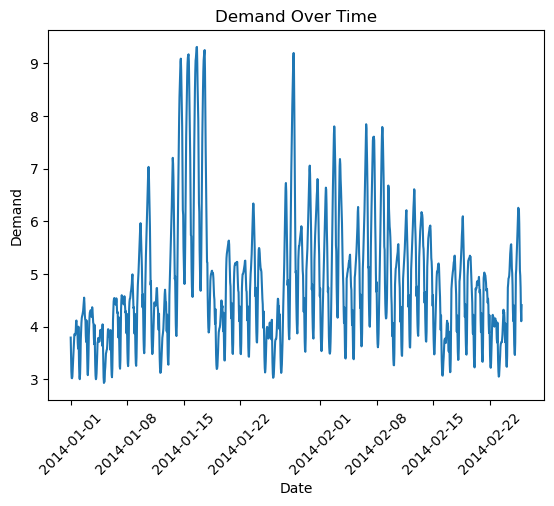

In [160]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
date = df['Timestamp']
demand = df['Demand']
plt.plot(date, demand)
plt.xticks(rotation=45) 
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Demand Over Time')
plt.show()

In [161]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [142]:
df.set_index('Timestamp',inplace=True)

In [143]:
df.describe()

,Demand,Temperature
count,1344.000000,1344.000000
mean,4.836867,22.031994
std,1.270180,6.089356
min,2.933000,10.950000
25%,3.894750,17.700000
50%,4.578000,20.625000
75%,5.438000,25.150000
max,9.313000,43.100000


<Axes: xlabel='Timestamp'>

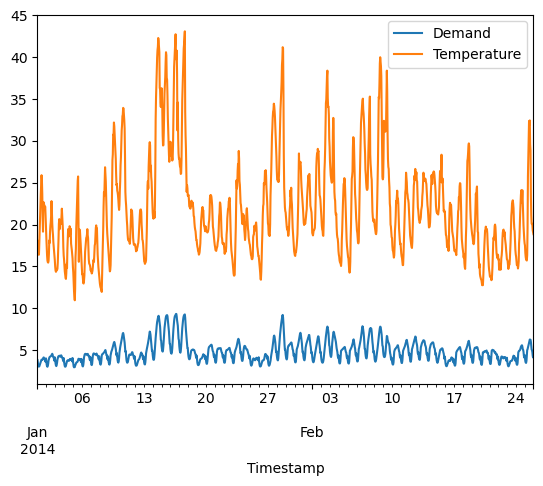

In [118]:
df.plot()

In [119]:
from statsmodels.tsa.stattools import adfuller
# Perform ADF test on the 'Temperature' column
result = adfuller(df['Demand'])

# Extract and print the test statistics and p-value
adf_statistic = result[0]
p_value = result[1]
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')

# Interpret the test results
if p_value <= 0.05:
    print('The time series is stationary.')
else:
    print('The time series is non-stationary.')


ADF Statistic: -3.3819451656712025
p-value: 0.011589975540970776
The time series is stationary.


In [122]:
from pmdarima import auto_arima
time_series = df['Demand']
model = auto_arima(time_series, seasonal=False, trace=True)

# Print the selected model order (p, d, q)
print(f'ARIMA Model Order: ({model.order[0]}, {model.order[1]}, {model.order[2]})')


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-318.429, Time=1.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=519.722, Time=0.46 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-264.943, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-96.037, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=517.725, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-271.929, Time=1.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-303.508, Time=2.15 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.59 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-350.318, Time=2.27 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-351.976, Time=1.25 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-310.698, Time=0.75 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-350.299, Time=2.74 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-151.772, Time=0.66 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-346.962, Time=1.44 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC

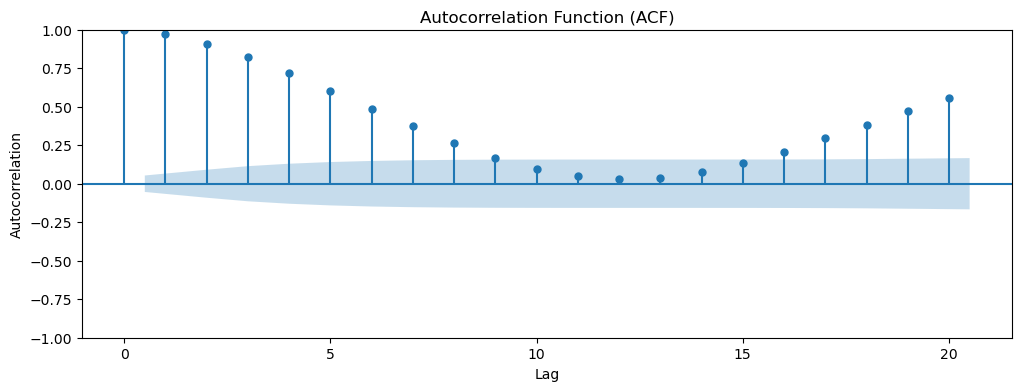

C:\Users\MSI\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


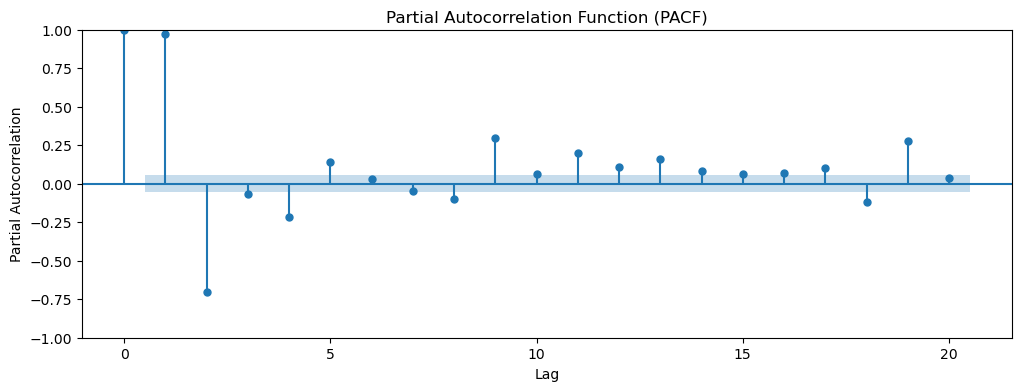

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
time_series = df['Demand']
fig, ax = plt.subplots(figsize=(12, 4))
plot_acf(time_series, ax=ax, lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()
fig, ax = plt.subplots(figsize=(12, 4))
plot_pacf(time_series, ax=ax, lags=20)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [124]:
print(df.shape)
train_data=df.iloc[:len(df)]
test_data=df.iloc[-30:]
print(train_data.shape,test_data.shape)

(1344, 2)
(1344, 2) (30, 2)


In [125]:
exog_train = train_data[['Temperature']].values
exog_test = test_data[['Temperature']].values

In [126]:
import statsmodels.api as sm
model_sarimax = sm.tsa.statespace.SARIMAX(df['Demand'], exog=exog_train, order=(1, 1,3), seasonal_order=(1, 1,3, 12))
results = model_sarimax.fit()
print(results.summary())

C:\Users\MSI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\MSI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\MSI\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             Demand   No. Observations:                 1344
Model:             SARIMAX(1, 1, 3)x(1, 1, 3, 12)   Log Likelihood                1439.685
Date:                            Fri, 04 Aug 2023   AIC                          -2859.370
Time:                                    14:37:48   BIC                          -2807.433
Sample:                                01-01-2014   HQIC                         -2839.906
                                     - 02-25-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0078      0.001      7.117      0.000       0.006       0.010
ar.L1          0.5336      0.064   

In [127]:
forecast_demand_sarimax = results.get_forecast(steps=len(test_data), exog=exog_test)
predicted_mean = forecast_demand_sarimax.predicted_mean
print(predicted_mean)

2014-02-26 00:00:00    4.031682
2014-02-26 01:00:00    3.689904
2014-02-26 02:00:00    3.549521
2014-02-26 03:00:00    3.570044
2014-02-26 04:00:00    3.851128
2014-02-26 05:00:00    4.469886
2014-02-26 06:00:00    5.078249
2014-02-26 07:00:00    5.161746
2014-02-26 08:00:00    5.310124
2014-02-26 09:00:00    5.407297
2014-02-26 10:00:00    5.485985
2014-02-26 11:00:00    5.592673
2014-02-26 12:00:00    5.677267
2014-02-26 13:00:00    5.803248
2014-02-26 14:00:00    5.853004
2014-02-26 15:00:00    5.910544
2014-02-26 16:00:00    5.826218
2014-02-26 17:00:00    5.522527
2014-02-26 18:00:00    5.227212
2014-02-26 19:00:00    5.167380
2014-02-26 20:00:00    4.971108
2014-02-26 21:00:00    4.551654
2014-02-26 22:00:00    4.296956
2014-02-26 23:00:00    4.535817
2014-02-27 00:00:00    4.101408
2014-02-27 01:00:00    3.763390
2014-02-27 02:00:00    3.631204
2014-02-27 03:00:00    3.657554
2014-02-27 04:00:00    3.943313
2014-02-27 05:00:00    4.544572
Freq: H, Name: predicted_mean, dtype: fl

In [128]:
train_data_demand = train_data['Demand'].values
test_data_demand = test_data['Demand'].values

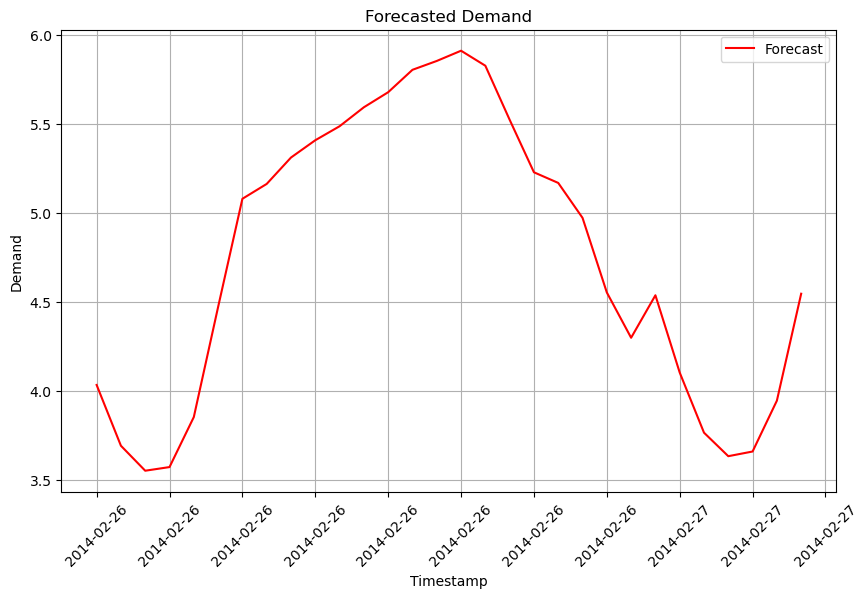

In [129]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# Assuming you have already made the forecast and obtained the forecast_dates and predicted_values
# Get the forecasted dates and predicted values (y-hat) based on your method of forecasting
  # Replace with the forecasted dates
predicted_values = predicted_mean  # Replace with the predicted values (y-hat)
plt.figure(figsize=(10, 6))

# Plot the forecasted graph with red color and dashed line
plt.plot(predicted_values, label='Forecast', color='red', linestyle='-')

plt.xlabel('Timestamp')
plt.ylabel('Demand')
plt.title('Forecasted Demand')
plt.legend()
plt.grid(True)

# Set the X-axis date locator and formatter to show only the first day of each month

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate the x-axis tick labels by 45 degrees for better readability
plt.xticks(rotation=45)
plt.show()

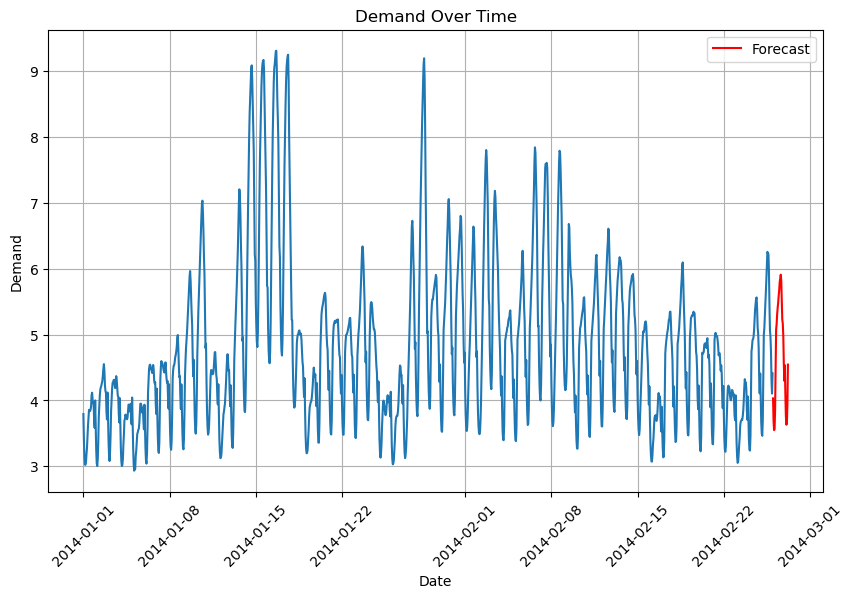

In [162]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# Assuming you have already made the forecast and obtained the forecast_dates and predicted_values
# Get the forecasted dates and predicted values (y-hat) based on your method of forecasting
  # Replace with the forecasted dates
predicted_values = predicted_mean  # Replace with the predicted values (y-hat)
plt.figure(figsize=(10, 6))

# Plot the forecasted graph with red color and dashed line
plt.plot(predicted_values, label='Forecast', color='red', linestyle='-')

plt.xlabel('Timestamp')
plt.ylabel('Demand')
plt.title('Forecasted Demand')
plt.legend()
plt.grid(True)


# Set the X-axis date locator and formatter to show only the first day of each month

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate the x-axis tick labels by 45 degrees for better readability
plt.xticks(rotation=45)


df['Timestamp'] = pd.to_datetime(df['Timestamp'])
date = df['Timestamp']
demand = df['Demand']
plt.plot(date, demand)
plt.xticks(rotation=45) 
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Demand Over Time')
plt.show()
